In [37]:
# ==============================================================================
# CELL 1: IMPORT LIBRARIES AND SETUP
# ==============================================================================
"""
Notebook 2: Exploratory Data Analysis & Visualization
This notebook performs detailed EDA on the cleaned LendingClub dataset
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set plotting parameters
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("=" * 80)
print("PART 2: EXPLORATORY DATA ANALYSIS & VISUALIZATION")
print("=" * 80 + "\n")


PART 2: EXPLORATORY DATA ANALYSIS & VISUALIZATION



In [38]:
# ==============================================================================
# CELL 2: LOAD CLEANED DATASET
# ==============================================================================

print("Loading cleaned dataset...")
df = pd.read_csv('cleaned_lending_data.csv')
print(f"✓ Dataset loaded: {df.shape[0]:,} rows × {df.shape[1]} columns\n")

# Display basic info
print("Dataset Overview:")
print("-" * 80)
print(df.info())
print("\nFirst 5 rows:")
print(df.head())


Loading cleaned dataset...
✓ Dataset loaded: 1,268,685 rows × 22 columns

Dataset Overview:
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268685 entries, 0 to 1268684
Data columns (total 22 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   loan_amnt            1268685 non-null  float64
 1   term                 1268685 non-null  float64
 2   int_rate             1268685 non-null  float64
 3   installment          1268685 non-null  float64
 4   grade                1268685 non-null  object 
 5   sub_grade            1268685 non-null  object 
 6   emp_length           0 non-null        float64
 7   home_ownership       1268685 non-null  object 
 8   annual_inc           1268685 non-null  float64
 9   verification_status  1268685 non-null  object 
 10  dti                  1268685 non-null  float64
 11  delinq_2yrs          1268685 non-

In [39]:
# ==============================================================================
# CELL 3: TARGET VARIABLE ANALYSIS
# ==============================================================================

print("\n" + "=" * 80)
print("1. TARGET VARIABLE ANALYSIS")
print("=" * 80 + "\n")

# Target distribution
print("1.1 Loan Status Distribution:")
print("-" * 80)
target_counts = df['loan_status_binary'].value_counts()
print(target_counts)
print(f"\nDefault Rate: {(target_counts[1] / len(df) * 100):.2f}%")
print(f"Fully Paid Rate: {(target_counts[0] / len(df) * 100):.2f}%")



1. TARGET VARIABLE ANALYSIS

1.1 Loan Status Distribution:
--------------------------------------------------------------------------------
0    1020650
1     248035
Name: loan_status_binary, dtype: int64

Default Rate: 19.55%
Fully Paid Rate: 80.45%


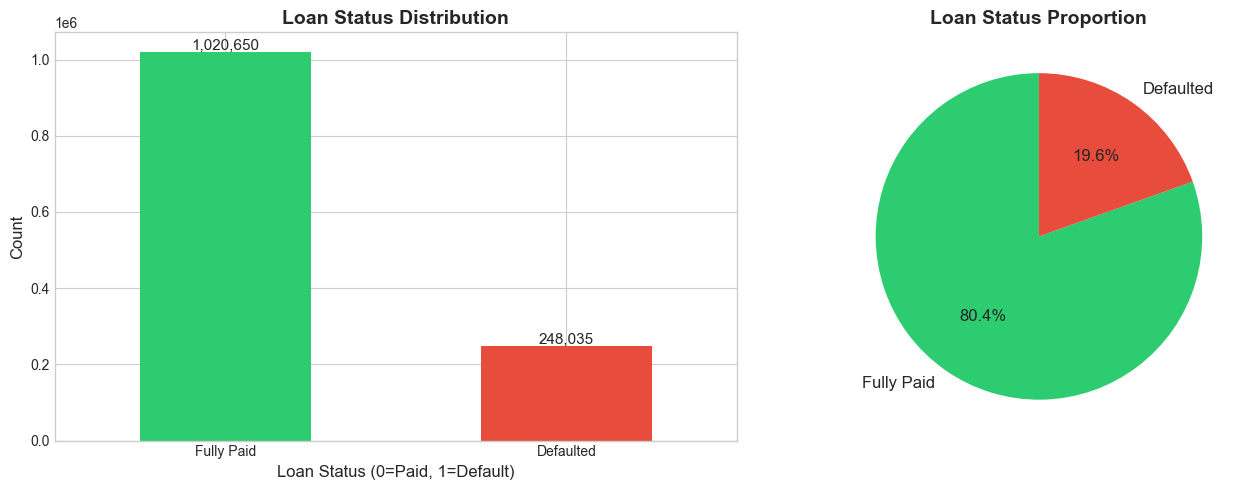

In [40]:
# ==============================================================================
# CELL 4: VISUALIZE TARGET DISTRIBUTION
# ==============================================================================

# Visualize target distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
target_counts.plot(kind='bar', ax=axes[0], color=['#2ecc71', '#e74c3c'])
axes[0].set_title('Loan Status Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Loan Status (0=Paid, 1=Default)', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_xticklabels(['Fully Paid', 'Defaulted'], rotation=0)
for i, v in enumerate(target_counts):
    axes[0].text(i, v + 5000, f'{v:,}', ha='center', fontsize=11)

# Pie chart
colors = ['#2ecc71', '#e74c3c']
axes[1].pie(target_counts, labels=['Fully Paid', 'Defaulted'], autopct='%1.1f%%',
            startangle=90, colors=colors, textprops={'fontsize': 12})
axes[1].set_title('Loan Status Proportion', fontsize=14, fontweight='bold')

plt.tight_layout()

plt.show()

In [41]:
# ==============================================================================
# CELL 5: NUMERICAL FEATURES ANALYSIS
# ==============================================================================

print("\n" + "=" * 80)
print("2. NUMERICAL FEATURES ANALYSIS")
print("=" * 80 + "\n")

# Select numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols = [col for col in numerical_cols if col not in ['loan_status_binary']]

print(f"2.1 Numerical Features Summary:")
print("-" * 80)
print(f"Number of numerical features: {len(numerical_cols)}")
print("\nDescriptive Statistics:")
print(df[numerical_cols].describe())


2. NUMERICAL FEATURES ANALYSIS

2.1 Numerical Features Summary:
--------------------------------------------------------------------------------
Number of numerical features: 14

Descriptive Statistics:
          loan_amnt          term      int_rate   installment  emp_length  \
count  1.268685e+06  1.268685e+06  1.268685e+06  1.268685e+06         0.0   
mean   1.459119e+04  4.190972e+01  1.323469e+01  4.426633e+02         NaN   
std    8.744510e+03  1.033966e+01  4.766075e+00  2.623947e+02         NaN   
min    5.000000e+02  3.600000e+01  5.310000e+00  4.930000e+00         NaN   
25%    8.000000e+03  3.600000e+01  9.750000e+00  2.517500e+02         NaN   
50%    1.200000e+04  3.600000e+01  1.274000e+01  3.791600e+02         NaN   
75%    2.000000e+04  3.600000e+01  1.599000e+01  5.870900e+02         NaN   
max    4.000000e+04  6.000000e+01  3.099000e+01  1.719830e+03         NaN   

         annual_inc           dti   delinq_2yrs  inq_last_6mths      open_acc  \
count  1.268685e+06  

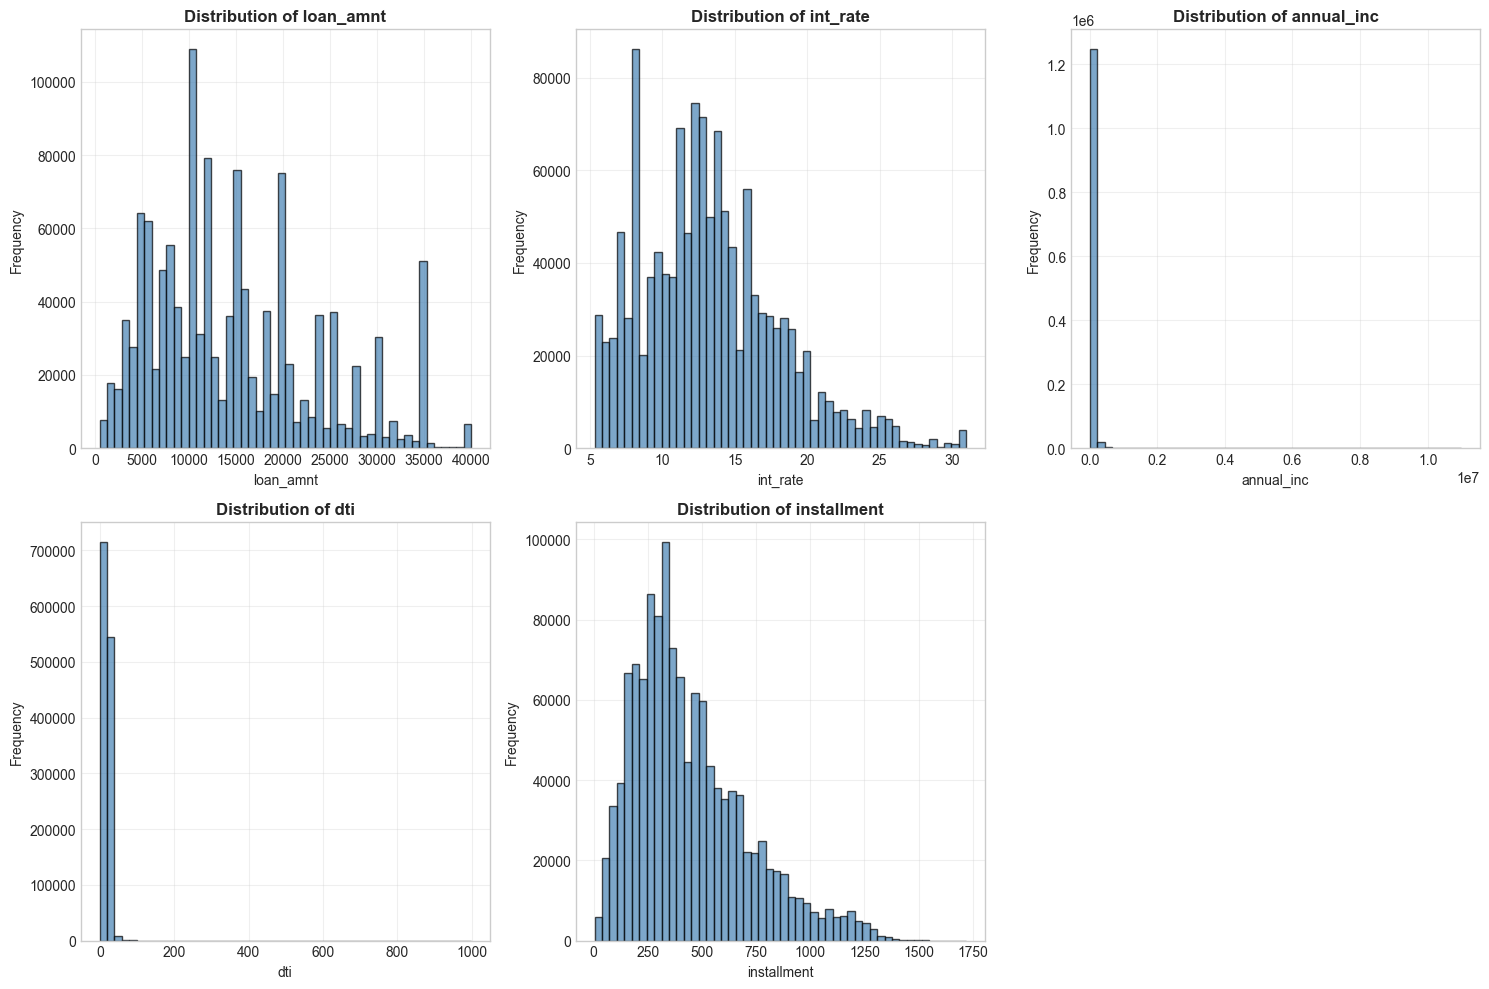

In [42]:
# ==============================================================================
# CELL 6: DISTRIBUTION OF KEY NUMERICAL FEATURES
# ==============================================================================

# Distribution of key numerical features
key_numerical = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'installment']
key_numerical = [col for col in key_numerical if col in df.columns]

if len(key_numerical) > 0:
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()
    
    for idx, col in enumerate(key_numerical):
        if idx < len(axes):
            # Histogram with KDE
            df[col].hist(bins=50, ax=axes[idx], alpha=0.7, color='steelblue', edgecolor='black')
            axes[idx].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
            axes[idx].set_xlabel(col, fontsize=10)
            axes[idx].set_ylabel('Frequency', fontsize=10)
            axes[idx].grid(alpha=0.3)
    
    # Remove empty subplots
    for idx in range(len(key_numerical), len(axes)):
        fig.delaxes(axes[idx])
    
    plt.tight_layout()
    
    plt.show()


In [43]:
# ==============================================================================
# CELL 7: CORRELATION ANALYSIS
# ==============================================================================

print("\n2.2 Correlation Analysis:")
print("-" * 80)

# Calculate correlation with target
if len(numerical_cols) > 0:
    correlations = df[numerical_cols + ['loan_status_binary']].corr()['loan_status_binary'].sort_values(ascending=False)
    print("\nTop 10 features correlated with default:")
    print(correlations.head(10))



2.2 Correlation Analysis:
--------------------------------------------------------------------------------

Top 10 features correlated with default:
loan_status_binary    1.000000
int_rate              0.260122
term                  0.180487
dti                   0.094859
loan_amnt             0.071388
inq_last_6mths        0.067152
revol_util            0.060174
installment           0.056558
open_acc              0.032479
pub_rec               0.025696
Name: loan_status_binary, dtype: float64


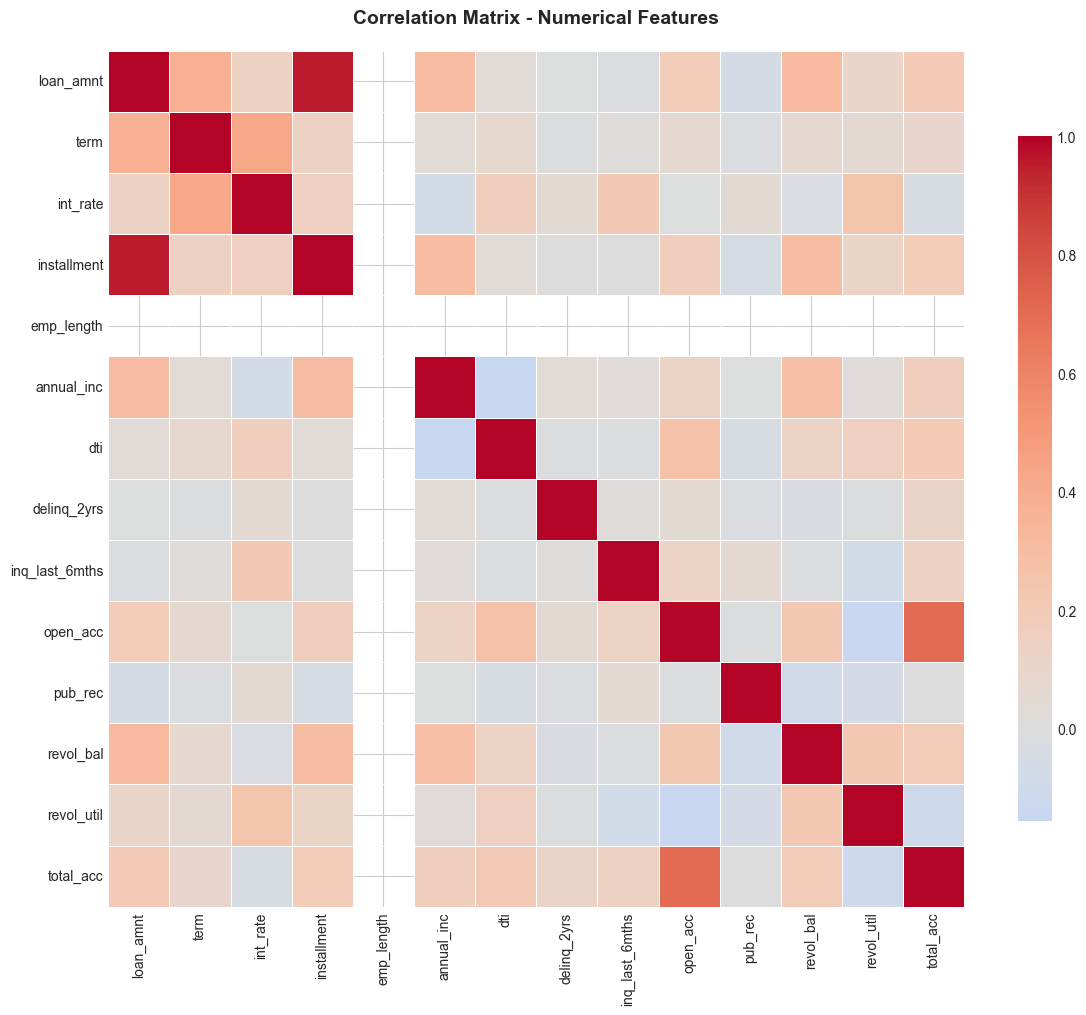

In [44]:
# ==============================================================================
# CELL 8: CORRELATION HEATMAP
# ==============================================================================

# Correlation heatmap
fig, ax = plt.subplots(figsize=(12, 10))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Numerical Features', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()

plt.show()

In [45]:
# ==============================================================================
# CELL 9: CATEGORICAL FEATURES ANALYSIS
# ==============================================================================

print("\n" + "=" * 80)
print("3. CATEGORICAL FEATURES ANALYSIS")
print("=" * 80 + "\n")

# Select categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols = [col for col in categorical_cols if col not in ['loan_status']]

print(f"3.1 Categorical Features Summary:")
print("-" * 80)
print(f"Number of categorical features: {len(categorical_cols)}\n")

for col in categorical_cols[:5]:  # Show first 5
    print(f"\n{col}:")
    print(df[col].value_counts().head())



3. CATEGORICAL FEATURES ANALYSIS

3.1 Categorical Features Summary:
--------------------------------------------------------------------------------
Number of categorical features: 6


grade:
B    370186
C    359332
A    222420
D    188548
E     88731
Name: grade, dtype: int64

sub_grade:
C1    80429
B4    78506
B5    77643
B3    77258
C2    74646
Name: sub_grade, dtype: int64

home_ownership:
MORTGAGE    630113
RENT        508812
OWN         129270
ANY            266
OTHER          177
Name: home_ownership, dtype: int64

verification_status:
Source Verified    506106
Not Verified       391468
Verified           371111
Name: verification_status, dtype: int64

purpose:
debt_consolidation    738321
credit_card           277661
home_improvement       81358
other                  72510
major_purchase         27852
Name: purpose, dtype: int64


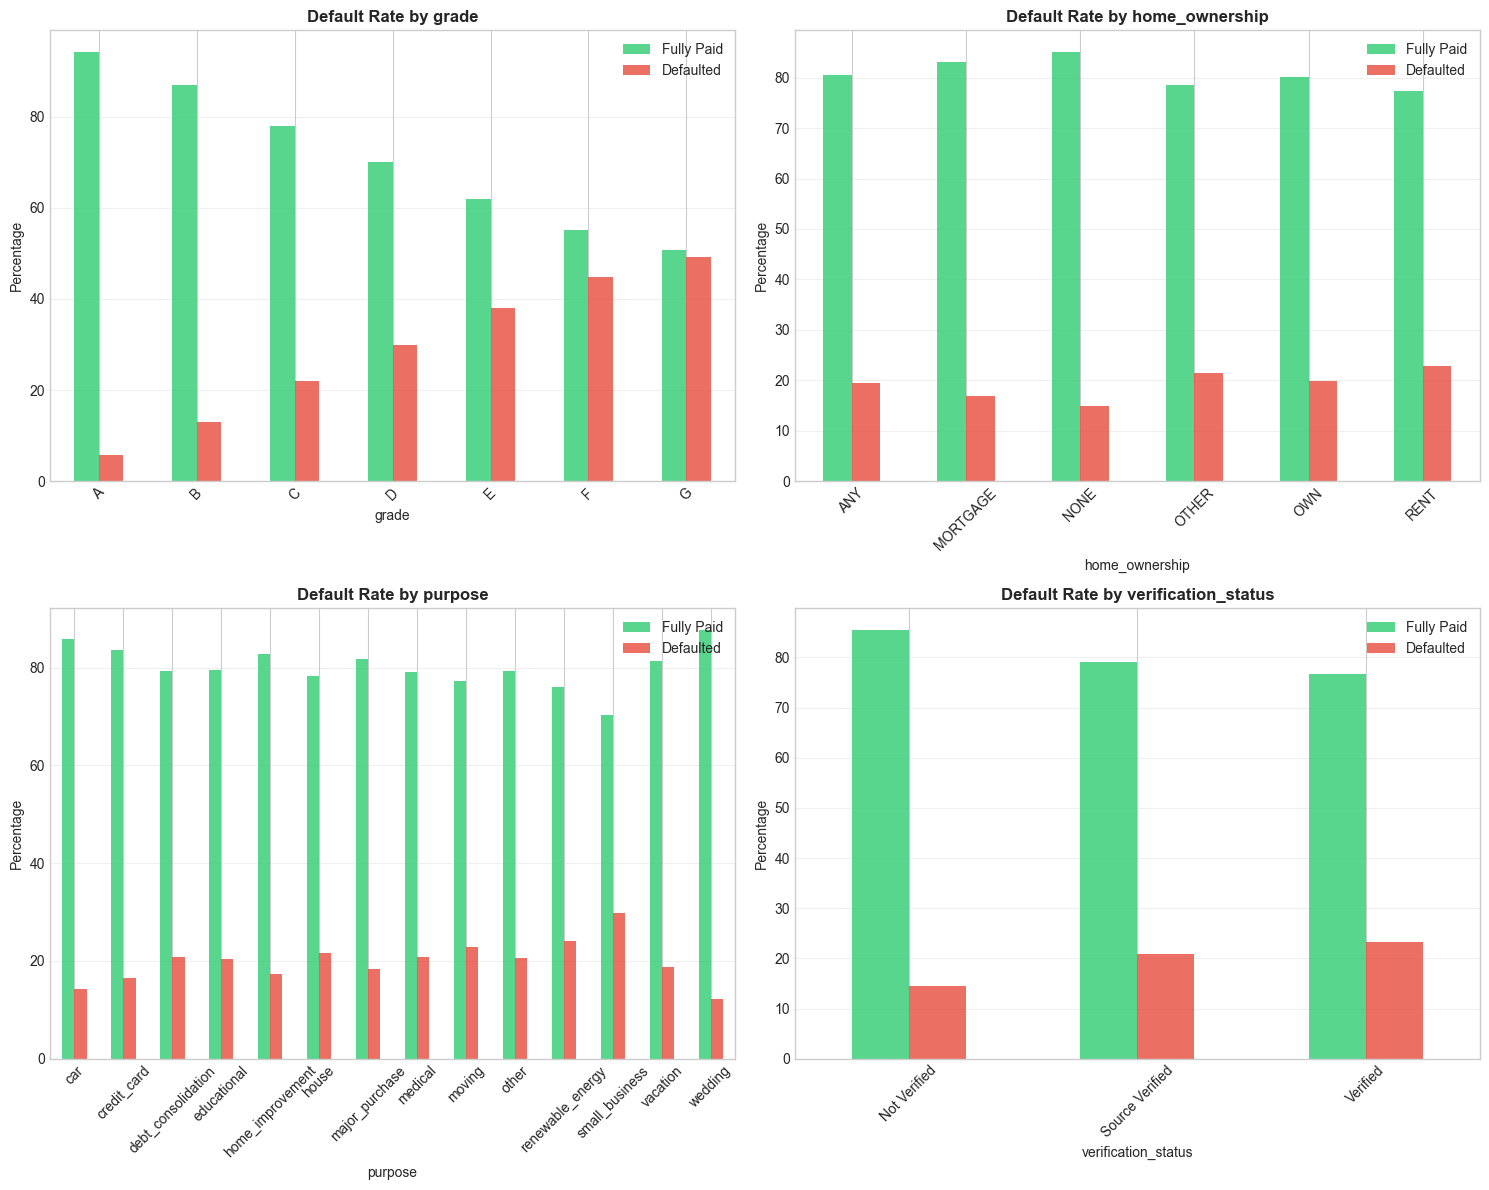

In [46]:
# ==============================================================================
# CELL 10: CATEGORICAL FEATURES VS TARGET
# ==============================================================================

# Visualize key categorical features vs target
key_categorical = ['grade', 'home_ownership', 'purpose', 'verification_status']
key_categorical = [col for col in key_categorical if col in df.columns]

if len(key_categorical) > 0:
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    axes = axes.flatten()
    
    for idx, col in enumerate(key_categorical):
        if idx < len(axes):
            # Create crosstab
            ct = pd.crosstab(df[col], df['loan_status_binary'], normalize='index') * 100
            ct.plot(kind='bar', ax=axes[idx], color=['#2ecc71', '#e74c3c'], alpha=0.8)
            axes[idx].set_title(f'Default Rate by {col}', fontsize=12, fontweight='bold')
            axes[idx].set_xlabel(col, fontsize=10)
            axes[idx].set_ylabel('Percentage', fontsize=10)
            axes[idx].legend(['Fully Paid', 'Defaulted'], loc='upper right')
            axes[idx].tick_params(axis='x', rotation=45)
            axes[idx].grid(alpha=0.3, axis='y')
    
    plt.tight_layout()
    
    plt.show()



4. BIVARIATE ANALYSIS

4.1 Loan Amount vs Interest Rate by Loan Status:
--------------------------------------------------------------------------------


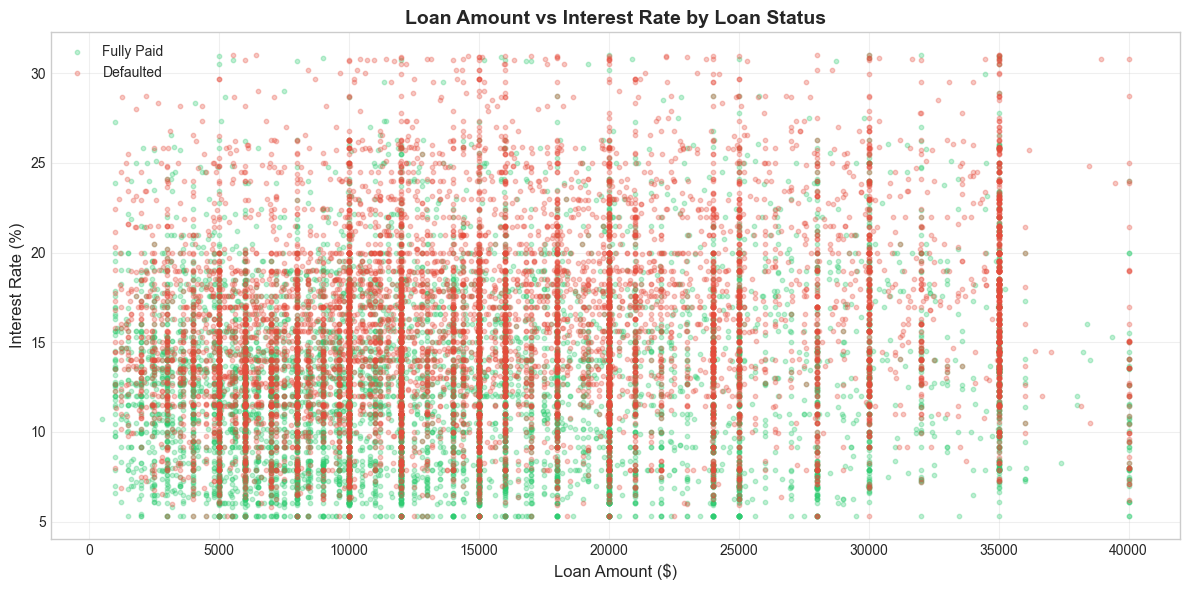

In [47]:
# ==============================================================================
# CELL 11: BIVARIATE ANALYSIS - LOAN AMOUNT VS INTEREST RATE
# ==============================================================================

print("\n" + "=" * 80)
print("4. BIVARIATE ANALYSIS")
print("=" * 80 + "\n")

print("4.1 Loan Amount vs Interest Rate by Loan Status:")
print("-" * 80)

if 'loan_amnt' in df.columns and 'int_rate' in df.columns:
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Scatter plot
    paid = df[df['loan_status_binary'] == 0]
    defaulted = df[df['loan_status_binary'] == 1]
    
    # Sample for better visualization if dataset is large
    if len(paid) > 10000:
        paid = paid.sample(n=10000, random_state=42)
    if len(defaulted) > 10000:
        defaulted = defaulted.sample(n=10000, random_state=42)
    
    ax.scatter(paid['loan_amnt'], paid['int_rate'], alpha=0.3, s=10, 
               color='#2ecc71', label='Fully Paid')
    ax.scatter(defaulted['loan_amnt'], defaulted['int_rate'], alpha=0.3, s=10,
               color='#e74c3c', label='Defaulted')
    
    ax.set_xlabel('Loan Amount ($)', fontsize=12)
    ax.set_ylabel('Interest Rate (%)', fontsize=12)
    ax.set_title('Loan Amount vs Interest Rate by Loan Status', fontsize=14, fontweight='bold')
    ax.legend()
    ax.grid(alpha=0.3)
    
    plt.tight_layout()
    
    plt.show()


4.2 Annual Income vs DTI by Loan Status:
--------------------------------------------------------------------------------


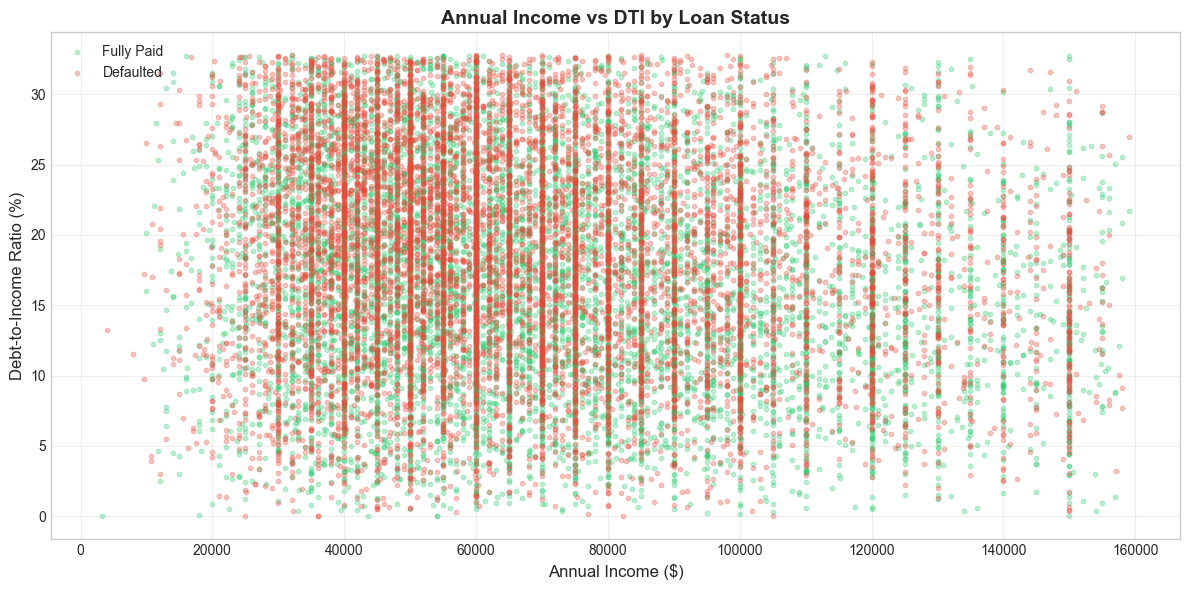

In [48]:
# ==============================================================================
# CELL 12: BIVARIATE ANALYSIS - ANNUAL INCOME VS DTI
# ==============================================================================

print("\n4.2 Annual Income vs DTI by Loan Status:")
print("-" * 80)

if 'annual_inc' in df.columns and 'dti' in df.columns:
    # Remove outliers for better visualization
    df_plot = df[(df['annual_inc'] < df['annual_inc'].quantile(0.95)) & 
                 (df['dti'] < df['dti'].quantile(0.95))]
    
    fig, ax = plt.subplots(figsize=(12, 6))
    
    paid = df_plot[df_plot['loan_status_binary'] == 0]
    defaulted = df_plot[df_plot['loan_status_binary'] == 1]
    
    # Sample for better visualization
    if len(paid) > 10000:
        paid = paid.sample(n=10000, random_state=42)
    if len(defaulted) > 10000:
        defaulted = defaulted.sample(n=10000, random_state=42)
    
    ax.scatter(paid['annual_inc'], paid['dti'], alpha=0.3, s=10,
               color='#2ecc71', label='Fully Paid')
    ax.scatter(defaulted['annual_inc'], defaulted['dti'], alpha=0.3, s=10,
               color='#e74c3c', label='Defaulted')
    
    ax.set_xlabel('Annual Income ($)', fontsize=12)
    ax.set_ylabel('Debt-to-Income Ratio (%)', fontsize=12)
    ax.set_title('Annual Income vs DTI by Loan Status', fontsize=14, fontweight='bold')
    ax.legend()
    ax.grid(alpha=0.3)
    
    plt.tight_layout()
    
    plt.show()



4.3 Loan Grade Analysis:
--------------------------------------------------------------------------------

Default Rate by Grade:
       Default_Rate   Count
grade                      
A          5.755328  222420
B         12.978881  370186
C         21.966872  359332
D         29.894775  188548
E         38.117456   88731
F         44.762465   30606
G         49.266531    8862


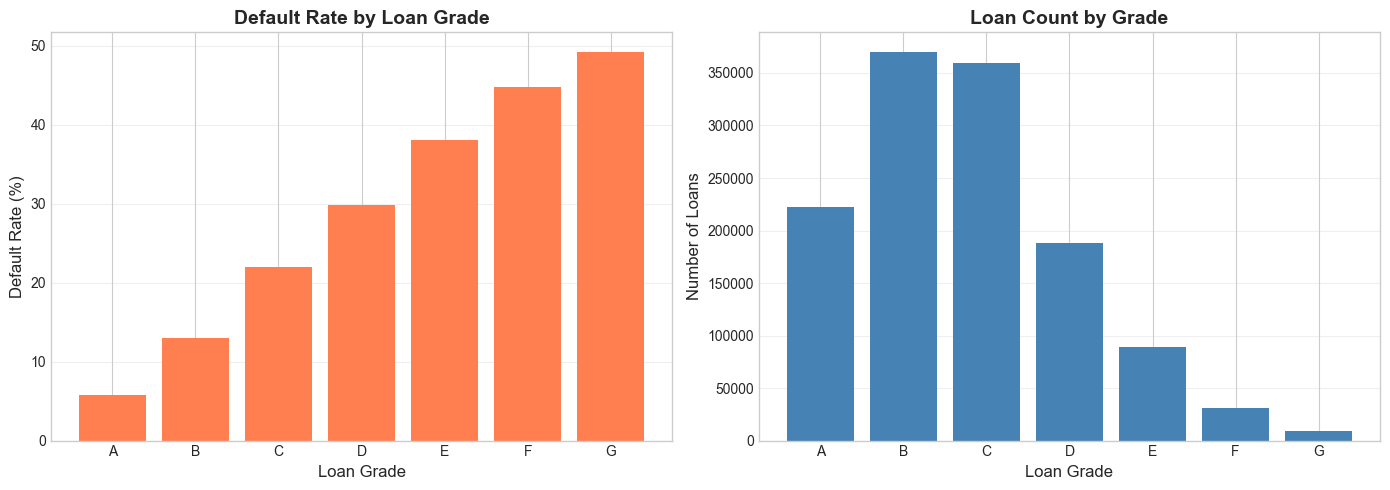

In [49]:
# ==============================================================================
# CELL 13: GRADE ANALYSIS
# ==============================================================================

print("\n4.3 Loan Grade Analysis:")
print("-" * 80)

if 'grade' in df.columns:
    # Default rate by grade
    grade_default = df.groupby('grade')['loan_status_binary'].agg(['mean', 'count'])
    grade_default.columns = ['Default_Rate', 'Count']
    grade_default['Default_Rate'] = grade_default['Default_Rate'] * 100
    
    print("\nDefault Rate by Grade:")
    print(grade_default)
    
    # Visualize
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Default rate
    axes[0].bar(grade_default.index, grade_default['Default_Rate'], color='coral')
    axes[0].set_xlabel('Loan Grade', fontsize=12)
    axes[0].set_ylabel('Default Rate (%)', fontsize=12)
    axes[0].set_title('Default Rate by Loan Grade', fontsize=14, fontweight='bold')
    axes[0].grid(alpha=0.3, axis='y')
    
    # Loan count
    axes[1].bar(grade_default.index, grade_default['Count'], color='steelblue')
    axes[1].set_xlabel('Loan Grade', fontsize=12)
    axes[1].set_ylabel('Number of Loans', fontsize=12)
    axes[1].set_title('Loan Count by Grade', fontsize=14, fontweight='bold')
    axes[1].grid(alpha=0.3, axis='y')
    
    plt.tight_layout()
    
    plt.show()


In [50]:
# ==============================================================================
# CELL 14: KEY INSIGHTS SUMMARY
# ==============================================================================

print("\n" + "=" * 80)
print("5. KEY INSIGHTS FROM EDA")
print("=" * 80 + "\n")

insights = []

# Default rate
default_rate = df['loan_status_binary'].mean() * 100
insights.append(f"Overall default rate: {default_rate:.2f}%")

# Grade analysis
if 'grade' in df.columns:
    grade_default = df.groupby('grade')['loan_status_binary'].mean() * 100
    worst_grade = grade_default.idxmax()
    insights.append(f"Highest default rate by grade: Grade {worst_grade} ({grade_default.max():.2f}%)")

# Interest rate analysis
if 'int_rate' in df.columns:
    avg_int_paid = df[df['loan_status_binary']==0]['int_rate'].mean()
    avg_int_default = df[df['loan_status_binary']==1]['int_rate'].mean()
    insights.append(f"Avg interest rate - Paid: {avg_int_paid:.2f}%, Defaulted: {avg_int_default:.2f}%")

# Loan amount analysis
if 'loan_amnt' in df.columns:
    avg_amt_paid = df[df['loan_status_binary']==0]['loan_amnt'].mean()
    avg_amt_default = df[df['loan_status_binary']==1]['loan_amnt'].mean()
    insights.append(f"Avg loan amount - Paid: ${avg_amt_paid:,.0f}, Defaulted: ${avg_amt_default:,.0f}")

# DTI analysis
if 'dti' in df.columns:
    avg_dti_paid = df[df['loan_status_binary']==0]['dti'].mean()
    avg_dti_default = df[df['loan_status_binary']==1]['dti'].mean()
    insights.append(f"Avg DTI - Paid: {avg_dti_paid:.2f}, Defaulted: {avg_dti_default:.2f}")

# Income analysis
if 'annual_inc' in df.columns:
    avg_inc_paid = df[df['loan_status_binary']==0]['annual_inc'].mean()
    avg_inc_default = df[df['loan_status_binary']==1]['annual_inc'].mean()
    insights.append(f"Avg annual income - Paid: ${avg_inc_paid:,.0f}, Defaulted: ${avg_inc_default:,.0f}")

print("Key Findings:")
print("-" * 80)
for i, insight in enumerate(insights, 1):
    print(f"{i}. {insight}")



5. KEY INSIGHTS FROM EDA

Key Findings:
--------------------------------------------------------------------------------
1. Overall default rate: 19.55%
2. Highest default rate by grade: Grade G (49.27%)
3. Avg interest rate - Paid: 12.62%, Defaulted: 15.75%
4. Avg loan amount - Paid: $14,283, Defaulted: $15,858
5. Avg DTI - Paid: 17.68, Defaulted: 19.96
6. Avg annual income - Paid: $79,197, Defaulted: $72,432


In [51]:
# ==============================================================================
# CELL 15: STATISTICAL TESTS
# ==============================================================================

print("\n" + "=" * 80)
print("6. STATISTICAL SIGNIFICANCE TESTS")
print("=" * 80 + "\n")

# T-test for numerical features
print("6.1 T-Tests for Numerical Features:")
print("-" * 80)

numerical_test_cols = ['int_rate', 'loan_amnt', 'annual_inc', 'dti']
numerical_test_cols = [col for col in numerical_test_cols if col in df.columns]

for col in numerical_test_cols:
    paid_values = df[df['loan_status_binary']==0][col].dropna()
    default_values = df[df['loan_status_binary']==1][col].dropna()
    
    t_stat, p_value = stats.ttest_ind(paid_values, default_values)
    
    print(f"\n{col}:")
    print(f"  T-statistic: {t_stat:.4f}")
    print(f"  P-value: {p_value:.4e}")
    print(f"  Significant: {'Yes' if p_value < 0.05 else 'No'}")


6. STATISTICAL SIGNIFICANCE TESTS

6.1 T-Tests for Numerical Features:
--------------------------------------------------------------------------------

int_rate:
  T-statistic: -303.4366
  P-value: 0.0000e+00
  Significant: Yes

loan_amnt:
  T-statistic: -80.6140
  P-value: 0.0000e+00
  Significant: Yes

annual_inc:
  T-statistic: 42.5792
  P-value: 0.0000e+00
  Significant: Yes

dti:
  T-statistic: -107.3286
  P-value: 0.0000e+00
  Significant: Yes


In [52]:
# CELL 16: SUMMARY STATISTICS TABLE
# ==============================================================================

print("\n" + "=" * 80)
print("7. SUMMARY STATISTICS TABLE")
print("=" * 80 + "\n")

# Create summary table
summary_stats = pd.DataFrame()

for status, name in [(0, 'Fully_Paid'), (1, 'Defaulted')]:
    subset = df[df['loan_status_binary'] == status]
    
    stats_dict = {
        'Status': name,
        'Count': len(subset),
        'Avg_Loan_Amount': subset['loan_amnt'].mean() if 'loan_amnt' in df.columns else np.nan,
        'Avg_Interest_Rate': subset['int_rate'].mean() if 'int_rate' in df.columns else np.nan,
        'Avg_Annual_Income': subset['annual_inc'].mean() if 'annual_inc' in df.columns else np.nan,
        'Avg_DTI': subset['dti'].mean() if 'dti' in df.columns else np.nan
    }
    
    summary_stats = pd.concat([summary_stats, pd.DataFrame([stats_dict])], ignore_index=True)

print("Summary Statistics by Loan Status:")
print(summary_stats.to_string(index=False))





7. SUMMARY STATISTICS TABLE

Summary Statistics by Loan Status:
    Status   Count  Avg_Loan_Amount  Avg_Interest_Rate  Avg_Annual_Income   Avg_DTI
Fully_Paid 1020650     14283.452236          12.623528       79196.700633 17.675196
 Defaulted  248035     15857.501865          15.749588       72432.475773 19.963568
